<H1>Sandbox</H1> 
Understand how to use qiskit primatives. 
<hr>
<H2>Modification history </H2><br> 
<table>
    <tr>
        <th> Modified </th>
        <th> By </th>
        <th> Reason </th>
    </tr>
    <tr> 
        <td> 08-Apr-25 </td>
        <td> CBL </td> 
        <td> Original </td>
    </tr>
</table>
<hr> 
<H2> References </H2> 
<a href="https://docs.quantum.ibm.com/guides/install-qiskit"> Install Qikit </a> <br> 
<a href="https://docs.quantum.ibm.com/guides/hello-world"> qiskit hello world </a> <br> 
<a href="https://qiskit-community.github.io/qiskit-dynamics/"> Qiskit dynamics</a> <br> 
<a href="https://pypi.org/project/qiskit/"> Pypi qiskit page</a> <br> 
<a href="https://docs.quantum.ibm.com/api/qiskit/visualization"> Visualization</a> <br> 
<H2> Notes </H2>
<br> 

In [5]:
# my standard includes
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.constants as const
#
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter, Delay
from qiskit.primitives import StatevectorSampler
from qiskit.quantum_info import SparsePauliOp
from qiskit.quantum_info import Pauli
from qiskit.transpiler import generate_preset_pass_manager
from qiskit.primitives import StatevectorEstimator as Estimator
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_histogram
from scipy.spatial.transform import Rotation as R

In [10]:
# This I got from the following webpage: 
# https://quantum.ibm.com/
# after logging in. I don't know if I need to get a new one everytime. 
#
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='131a9be70eb0a6f35a2f39733d514bd0651c07bf972efd30821e7227a87832c98181612f711f63fda8a199bbde4f5dc1952b93657c380cef4d8b3024aa7cf077'
)

# Or save your credentials on disk.
# QiskitRuntimeService.save_account(channel='ibm_quantum', instance='ibm-q/open/main', token='131a9be70eb0a6f35a2f39733d514bd0651c07bf972efd30821e7227a87832c98181612f711f63fda8a199bbde4f5dc1952b93657c380cef4d8b3024aa7cf077')

The case below is a 'single phase' experiment. <br> 
this puts the qubit into the state ${1\over {\sqrt{2}}}(\ket{0} + \ket{1})$

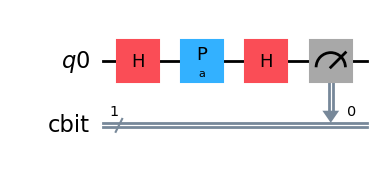

In [8]:
# create a register of classical bits
# Define the number of classical bits
num_cbits = 1
nqbit     = 1
nshots    = 2000
# Create a ClassicalRegister
creg = ClassicalRegister(num_cbits, 'cbit')
qreg = QuantumRegister(nqbit)
# Create a quantum circuit class with these registers. 
qc   = QuantumCircuit(qreg, creg)
#
# details on StatevectorSampler - really good example code. 
# https://docs.quantum.ibm.com/api/qiskit/qiskit.primitives.StatevectorSampler
#
# Instantiate a new statevector simulation based sampler object.
sampler = StatevectorSampler()
# 
# now actually operate on the circuit we created. 
# Apply a hadamard on qubit 0 - this creates equal path case, superposition
# The Hadamard gate can also be expressed as a 90º rotation around the Y-axis, followed by a 180º around the X-axis. 
#
qc.h(0)
# introduce a phase - change the path length. https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.PhaseGate
# This is a rotation around the z axis. 
# Make this variable driven
qc.p(Parameter('a'), 0)
# recombine the paths
qc.h(0)
# add a delay of 100 dt's, does not show up on plot. 
#Delay(100)
#qc_measured = qc.measure_all(inplace=False)
qc_measured = qc.measure(0, 0)
qc.draw('mpl')

In [42]:
result.data.cbit.get_counts(50)

{'0': 1996, '1': 4}

Text(0, 0.5, 'intensity')

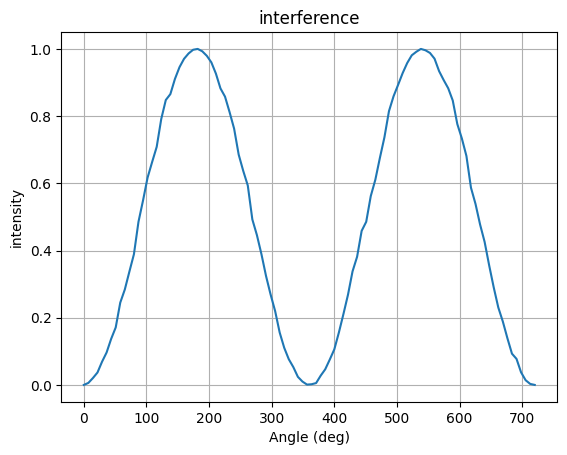

In [43]:
# Ok make a vector for plotting
# This is probably stupid
N = len(theta)
y = np.zeros(N)
for i in range(0,N):
    if ('1' in result.data.cbit.get_counts(i)):
        y[i] = result.data.cbit.get_counts(i)['1']
#print(len(y))
plt.plot(theta*180.0/np.pi,y/nshots)
plt.grid()
plt.title('interference')
plt.xlabel('Angle (deg)')
plt.ylabel('intensity')

In [2]:
# The number after the operator is the magnitude. 
H1 = SparsePauliOp.from_list([("II", 1), ("IZ", 2), ("XI", 3)])

In [3]:
print(H1)

SparsePauliOp(['II', 'IZ', 'XI'],
              coeffs=[1.+0.j, 2.+0.j, 3.+0.j])


In [ ]:
# But what do these magnitudes mean? 
#

In [6]:
# Create the estimmator 
estimator = Estimator()

In [12]:
# run the same circuit with the estimator
#
# Perform the experiment and loop over the phase angles. 
# Vary the phase parameter (theta) from 0 to pi/2, 1000 points. linspace is a numpy primative. 
theta = np.linspace(0., 4*np.pi, 100)
# pub stands for Primitive unified bloc
# multiple pubs may be submitted. 
# details on pubs - https://quantum.cloud.ibm.com/docs/en/guides/primitive-input-output
#
# estimator pubs
# quantum circuit
# A list of one or more observables: [ObservableArrayLike, Pauli, SparsePauliOp, PauliList, str]
# Collection of parameter objects, in this case theta
# 
observables = [SparsePauliOp("Z")]
pub   = (qc, observables, theta)
# Run the job
job = estimator.run([pub])
# get the results
result = job.result()[0]

QiskitError: 'Cannot apply instruction with classical bits: measure'